In [1]:
from PIL import Image
from os import listdir
import re

# Load the necessary script
%run '../src/EigenSpace.py'
%run '../src/EigenCrossValidation.py'
%run '../src/EigenSplitValidation.py'
%run '../src/ModelerView.py'
pathToImages = '../images/yalefaces/'

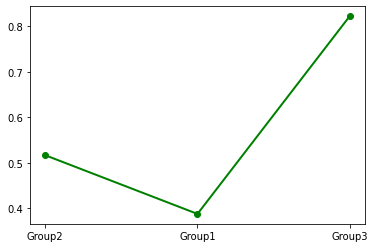

In [3]:
# Criar uma lista onde cada element possui um url e um tag, associada a imagem
imagesWithTags = []

for f in listdir(pathToImages):
    viewGrouping = 'Group3'
    regex_groups = re.match('subject([0-9]+)\.(.+)',f).groups()
    img = getImageByUrl(pathToImages + f)
    tag = int(regex_groups[0])
    view = regex_groups[1]

    if view in ['centerlight', 'glasses', 'happy', 'leftlight']:
        viewGrouping = 'Group1'
    elif view in ['noglasses', 'normal', 'rightlight', 'sad']:
        viewGrouping = 'Group2'

    imagesWithTags.append({"img":img,"tag":tag,"view":viewGrouping})

# Criar eigenSpace com as imagens acima.
eSpace = ModelerView(imagesWithTags, crossK=3)
eSpace.plotAccuracyByGroup()
